# <div class="alert alert-block alert-success" dir="rtl" style="text-align: center;"><strong><span style="font-size: 20pt">E Commerce Recomendation project <br /></span></strong></div>

# Importing required Libreries 

In [1]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.sparse import csr_matrix

# Load Dataset

In [2]:
# Step 2: Load the Dataset
file_path = "E:\Downloads\kurtiData.csv\kurtiData.csv"  # Replace with the actual path
data = pd.read_csv(file_path)

In [3]:
data_copy = data

In [4]:
data_copy

,user_id,product_id,product_url,image_url,price,rating,timestamp
0,0b32cb93b4d1467a895fdd0c0fdcac7d,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1816526580
1,a546c81dcb9346619c00f3632bb39318,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1431790209
2,6f7480ff712d42eb9be53f37641a3bf9,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1455698017
3,cf05abc75bd74b159bc91a76ad4bfbb5,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1419335880
4,893a87b0ef41435cbd40f5065bdff448,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,₹293,5,1195975318
...,...,...,...,...,...,...,...
425993,2c831096d8b542a48f597a7a34084b76,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,₹565,3,1548675154
425994,50c23ada396c432a84c365ade77b46f5,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,₹565,3,1976300930
425995,12754d1b019a4effa4b70b59952cf9c0,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,₹565,3,1521222823
425996,d9904f7f0d644bd6a43c7deeb3964e9f,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,₹565,3,1673400773


Load and Inspect the Data: Analyze the structure of the dataset.

Perform EDA: Generate descriptive statistics and visualizations.

Preprocess the Data: Clean and transform the data.

Recommendation Model:

Build and evaluate both collaborative and content-based filtering models.

Present Insights: Summarize the findings.

# Dataset Overview
The dataset contains 425,998 rows and the following columns:

user_id: Unique identifier for users.

product_id: Unique identifier for products.

product_url: URL of the product.

image_url: URL for the product image.

price: Product price (currently in a string format with currency symbols).

rating: User rating of the product (integer).

timestamp: Unix timestamp of the transaction.

# Observations:
The price column needs to be converted to numerical values.

The timestamp column needs to be converted to a human-readable datetime format.

We can focus on user_id, product_id, rating, and price for recommendation modeling.

# Step 1: Data Cleaning


In [5]:
# Step 3: Data Cleaning
# Remove currency symbol and convert 'price' to numeric
data['price'] = data['price'].str.replace('₹', '', regex=False).str.replace(',', '').astype(float)

I will clean the data by:

#Removing the currency symbol from the price column.
#Converting timestamp to a readable format.
#Checking for duplicates or missing values.
#Let’s start cleaning the data. ​​

#Data Cleaning Results
Missing Values: No missing values in any columns.

Duplicates: No duplicate rows detected.

Cleaned Columns:

price: Converted to a numerical format.

timestamp: Converted to a human-readable datetime format.

In [6]:
# Convert 'timestamp' to a readable datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s', errors='coerce')

In [7]:
data

,user_id,product_id,product_url,image_url,price,rating,timestamp
0,0b32cb93b4d1467a895fdd0c0fdcac7d,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2027-07-25 14:43:00
1,a546c81dcb9346619c00f3632bb39318,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2015-05-16 15:30:09
2,6f7480ff712d42eb9be53f37641a3bf9,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2016-02-17 08:33:37
3,cf05abc75bd74b159bc91a76ad4bfbb5,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2014-12-23 11:58:00
4,893a87b0ef41435cbd40f5065bdff448,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2007-11-25 07:21:58
...,...,...,...,...,...,...,...
425993,2c831096d8b542a48f597a7a34084b76,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,565.0,3,2019-01-28 11:32:34
425994,50c23ada396c432a84c365ade77b46f5,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,565.0,3,2032-08-16 20:28:50
425995,12754d1b019a4effa4b70b59952cf9c0,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,565.0,3,2018-03-16 17:53:43
425996,d9904f7f0d644bd6a43c7deeb3964e9f,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,565.0,3,2023-01-11 01:32:53


# Checking for missing values and duplicates 

In [8]:
# Step 4: Check for Missing or Duplicate Values
print("Missing Values:\n", data.isnull().sum())
print("\nDuplicate Rows:", data.duplicated().sum())

Missing Values:
 user_id        0
product_id     0
product_url    0
image_url      0
price          0
rating         0
timestamp      0
dtype: int64

Duplicate Rows: 0


# Exploratory Data Analysis (EDA)

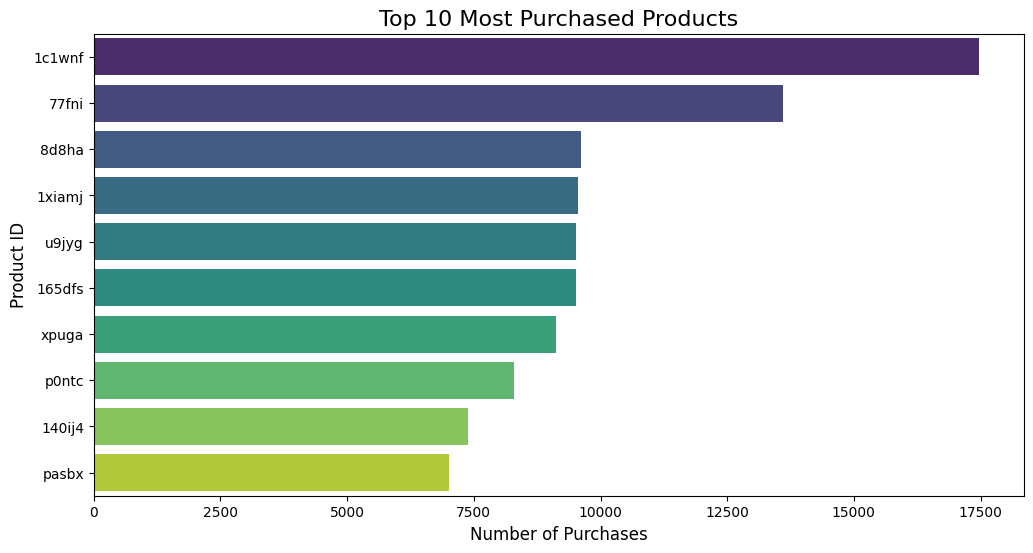

In [9]:
# Step 5: Exploratory Data Analysis (EDA)
# Top 10 Most Purchased Products
plt.figure(figsize=(12, 6))
top_products = data['product_id'].value_counts().head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Most Purchased Products", fontsize=16)
plt.xlabel("Number of Purchases", fontsize=12)
plt.ylabel("Product ID", fontsize=12)
plt.show()

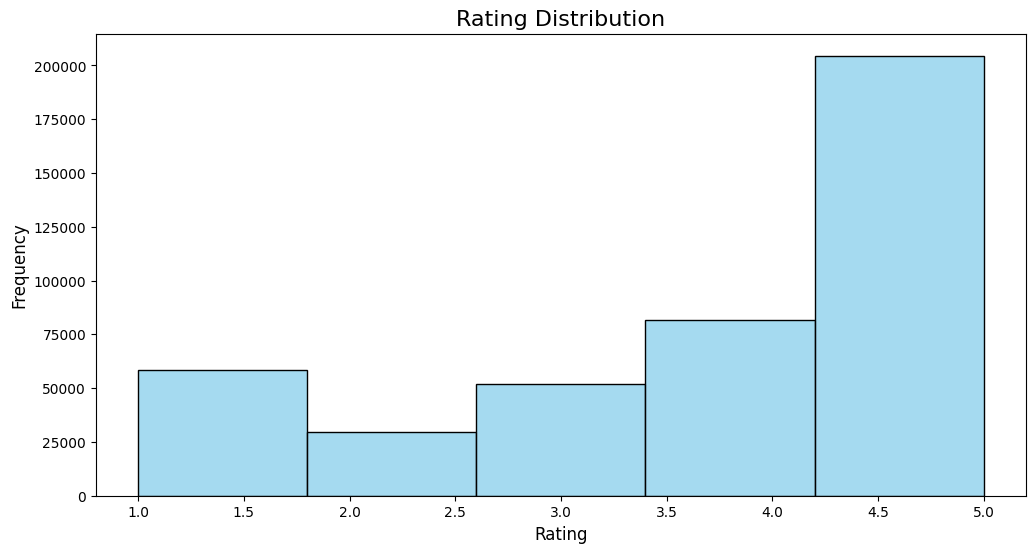

In [10]:
# Rating Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['rating'], bins=5, kde=False, color="skyblue")
plt.title("Rating Distribution", fontsize=16)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

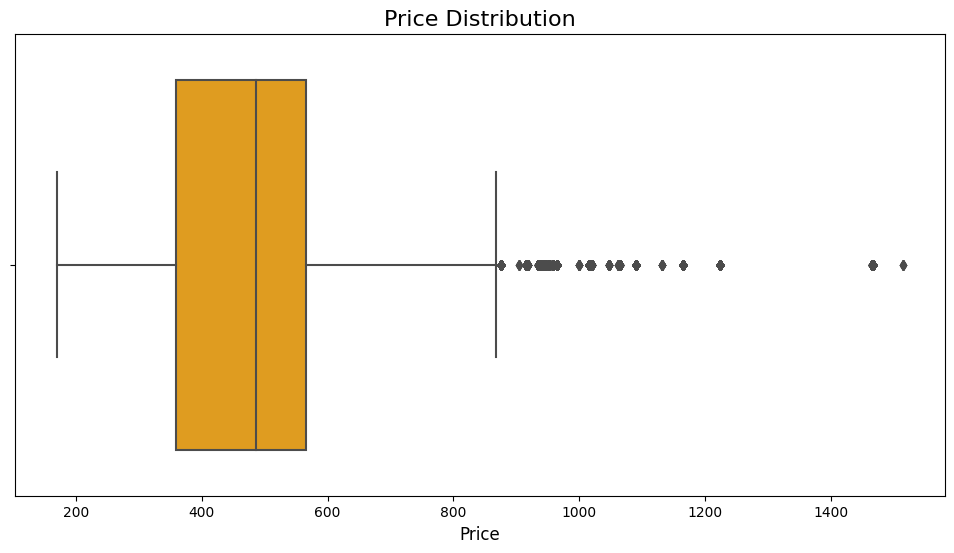

In [11]:
# Price Distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x=data['price'], color="orange")
plt.title("Price Distribution", fontsize=16)
plt.xlabel("Price", fontsize=12)
plt.show()

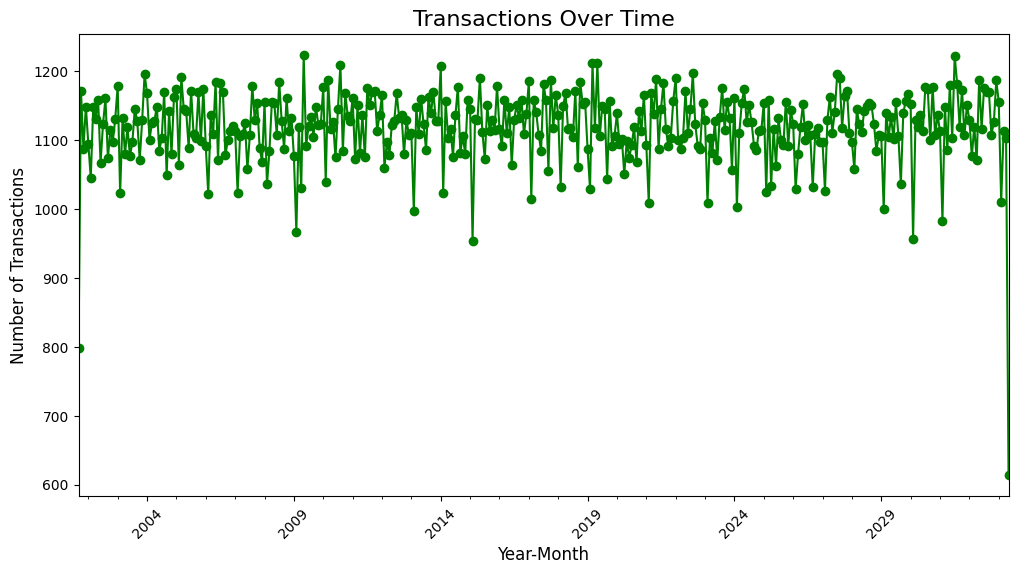

In [12]:
# Transactions Over Time
plt.figure(figsize=(12, 6))
data['year_month'] = data['timestamp'].dt.to_period('M')
transactions_over_time = data.groupby('year_month').size()
transactions_over_time.plot(kind='line', marker='o', color='green')
plt.title("Transactions Over Time", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Data Preparation for Recommendation Model

In [13]:
# Step 6: Data Preparation for Recommendation Model
# Create a User-Item Interaction Matrix
interaction_matrix = data.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

In [14]:
# Convert the interaction matrix to a sparse matrix for efficiency
sparse_matrix = csr_matrix(interaction_matrix.values)

In [15]:
# Print Matrix Shape and Non-Zero Elements
print("Interaction Matrix Shape:", interaction_matrix.shape)
print("Non-Zero Interactions:", sparse_matrix.nnz)

Interaction Matrix Shape: (30000, 946)
Non-Zero Interactions: 425998


# Recommendation Model Code

# if not able to install package go with alternatives 

# Code for Recommendation Model

# import required libreries

In [16]:
#import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

In [17]:
interaction_matrix

product_id,100jt3,105mbl,108m4r,108o0m,108skr,10abqj,10lkdl,10mrkq,10nue7,10u824,...,z3u2o,z5qzi,z6ckb,z6lgq,z7ayh,z7l3y,ze031,zgxlp,zqe9o,zs19v
user_id,,,,,,,,,,,,,,,,,,,,,
000309eea4da451792c02dcf044c6da9,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00039769c82740bb8681b29311456292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000ab7843cc04021b2f660fb9f5a4f0c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000b43224557420d8eb107c93c74dd29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000c5704edd84f77bedf68a95c54edeb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffec86d6711348a7bc3a320d86c6d597,0,5,0,0,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ffef7142a8414973851fc85f3be8dfae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fff19d1af160419cac4de7f303c4e647,0,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 1: Create User-Item Interaction Matrix

In [ ]:
# Step 1: Create User-Item Interaction Matrix
#Already created no need to create once
#interaction_matrix = data.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# Step 2: Calculate Cosine Similarity for Users

In [18]:
# Step 2: Calculate Cosine Similarity for Users
user_similarity = cosine_similarity(interaction_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=interaction_matrix.index, columns=interaction_matrix.index)

# Step 3: Recommend Products for a User

In [19]:
# Step 3: Recommend Products for a User
def recommend_products(user_id, interaction_matrix, user_similarity_df, n_recommendations=5):
    """
    Recommend top N products for a given user based on user similarity.
    """
    if user_id not in interaction_matrix.index:
        return f"User {user_id} not found in the dataset."
    
    # Get user's interaction data
    user_ratings = interaction_matrix.loc[user_id]
    
    # Calculate weighted scores for all products based on similar users
    similar_users = user_similarity_df[user_id]
    weighted_scores = interaction_matrix.T.dot(similar_users).div(similar_users.sum())
    
    # Exclude already purchased products
    already_purchased = user_ratings[user_ratings > 0].index
    recommendations = weighted_scores.drop(already_purchased).sort_values(ascending=False).head(n_recommendations)
    
    return recommendations

# Step 4: Generate Recommendations for a Specific User

In [20]:
# Step 4: Generate Recommendations for a Specific User
sample_user_id = interaction_matrix.index[0]  # Example: first user in the dataset
top_recommendations = recommend_products(sample_user_id, interaction_matrix, user_similarity_df)

In [21]:
# Display the recommendations
print(f"\nTop Recommendations for User {sample_user_id}:\n")
print(top_recommendations)


Top Recommendations for User 000309eea4da451792c02dcf044c6da9:

product_id
1c1wnf    2.388412
77fni     1.759739
xpuga     1.214652
8d8ha     1.163906
1xiamj    1.125336
dtype: float64


# checking the recomendation model for another user 

In [22]:
sample_user_id_2 = interaction_matrix.index[2]  # Example: first user in the dataset
Top_recommendations = recommend_products(sample_user_id, interaction_matrix, user_similarity_df)

In [23]:
# Display the recommendations
print(f"\nTop Recommendations for User {sample_user_id_2}:\n")
print(Top_recommendations)


Top Recommendations for User 000ab7843cc04021b2f660fb9f5a4f0c:

product_id
1c1wnf    2.388412
77fni     1.759739
xpuga     1.214652
8d8ha     1.163906
1xiamj    1.125336
dtype: float64


# Explanation of the Code
User-Item Interaction Matrix:

Each row represents a user, and each column represents a product.
The matrix is filled with ratings or 0 if no rating is available.
# Cosine Similarity:
Measures the similarity between users based on their interaction history.
# Weighted Scores:
Recommendations are scored based on the weighted average of ratings by similar users.
# Excluding Purchased Products:
Products already rated by the user are excluded from the recommendations.
# Top-N Recommendations:
The function returns the top n products for the specified user.
Results
# When you run this code:

It calculates personalized recommendations for the given user.
You can adjust the n_recommendations parameter to get more or fewer recommendations.


# interactive model

In [24]:
from ipywidgets import widgets, VBox
from IPython.display import display

In [25]:
# Textbox for User Input
user_id_widget = widgets.Text(
    placeholder='Enter User ID',
    description='User ID:',
    style={'description_width': 'initial'},
)

In [26]:
# Button to Trigger Recommendations
button = widgets.Button(
    description='Get Recommendations',
    button_style='success',  # 'success', 'info', 'warning', 'danger' for styling
)

In [27]:
# Output Widget for Displaying Results
output = widgets.Output()

In [28]:
# Function to Handle Button Click
def on_button_click(change):
    with output:
        output.clear_output()  # Clear previous output
        user_id = user_id_widget.value.strip()  # Get input from textbox
        if user_id:
            try:
                recommendations = recommend_products(user_id, interaction_matrix, user_similarity_df, n_recommendations=5)
                print(f"\nTop Recommendations for User {user_id}:\n")
                if isinstance(recommendations, str):  # If user not found
                    print(recommendations)
                else:
                    display(recommendations)
            except Exception as e:
                print(f"Error: {e}")
        else:
            print("Please enter a valid User ID.")

In [29]:
# Link Button Click to Function
button.on_click(on_button_click)

In [30]:
# Display the Interface
display(VBox([user_id_widget, button, output]))

# We can see successfully the recomendations are predicted by our model even in  a interactive way 

In [31]:
data_copy

,user_id,product_id,product_url,image_url,price,rating,timestamp,year_month
0,0b32cb93b4d1467a895fdd0c0fdcac7d,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2027-07-25 14:43:00,2027-07
1,a546c81dcb9346619c00f3632bb39318,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2015-05-16 15:30:09,2015-05
2,6f7480ff712d42eb9be53f37641a3bf9,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2016-02-17 08:33:37,2016-02
3,cf05abc75bd74b159bc91a76ad4bfbb5,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2014-12-23 11:58:00,2014-12
4,893a87b0ef41435cbd40f5065bdff448,1xiamj,https://www.meesho.com/alisha-refined-kurtis/p...,https://images.meesho.com/images/products/1167...,293.0,5,2007-11-25 07:21:58,2007-11
...,...,...,...,...,...,...,...,...
425993,2c831096d8b542a48f597a7a34084b76,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,565.0,3,2019-01-28 11:32:34,2019-01
425994,50c23ada396c432a84c365ade77b46f5,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,565.0,3,2032-08-16 20:28:50,2032-08
425995,12754d1b019a4effa4b70b59952cf9c0,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,565.0,3,2018-03-16 17:53:43,2018-03
425996,d9904f7f0d644bd6a43c7deeb3964e9f,201ubc,https://www.meesho.com/abhisarika-graceful-kur...,https://images.meesho.com/images/products/1210...,565.0,3,2023-01-11 01:32:53,2023-01


# deep dive in to data and find the tresure 

# 1. Feature Engineering

Enhance the dataset by creating new features:

Purchase Frequency: Calculate how often each product is purchased.

User Activity: Determine the number of transactions or ratings per user.
    
Average Product Rating: Compute the average rating for each product.
                                                  
Recency of Purchases: Add a feature to indicate how recent a purchase or rating was (e.g., days since last transaction).
                                                  
Price Categories: Segment products into categories based on price ranges

In [ ]:
# Purchase frequency by product
product_frequency = data['product_id'].value_counts().reset_index()
product_frequency.columns = ['product_id', 'purchase_count']
print(product_frequency.head())




In [ ]:
# Average rating per product
avg_rating = data.groupby('product_id')['rating'].mean().reset_index()
avg_rating.columns = ['product_id', 'average_rating']
print(avg_rating.head())

# Top rated producct

In [ ]:
# Calculate the average rating per product
avg_rating = data.groupby('product_id')['rating'].mean().reset_index()
avg_rating.columns = ['product_id', 'average_rating']

# Sort by average_rating in descending order
avg_rating = avg_rating.sort_values(by='average_rating', ascending=False)

# Display the top rows
print(avg_rating.head(10))


# 2. Content-Based Filtering

Use product features (e.g., categories, price) to recommend similar items based on what the user has purchased or rated highly.

Steps:

Create vectors for each product using its features.
    
Use similarity metrics (e.g., cosine similarity) to find similar products.

In [ ]:
#from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.preprocessing import MinMaxScaler

# Normalize price and rating
scaler = MinMaxScaler()
product_features = data[['price', 'rating']].drop_duplicates()
product_features_scaled = scaler.fit_transform(product_features)



In [ ]:
# Calculate similarity
similarity_matrix = cosine_similarity(product_features_scaled)



In [ ]:
# Recommend products similar to a given product
product_id = '1xiamj'  # Example product ID
product_idx = data[data['product_id'] == product_id].index[0]
similar_products = similarity_matrix[product_idx].argsort()[-6:-1][::-1]

print("Top similar products:", data['product_id'].iloc[similar_products].values)


# 3. Time-Based Recommendations

Incorporate temporal information:

Analyze purchasing trends over time.

Build a time-decay factor to prioritize recent interactions.

Identify seasonal trends (e.g., holiday sales).

In [ ]:
# Add a 'days_since_last_purchase' feature
data['days_since_purchase'] = (pd.Timestamp.now() - data['timestamp']).dt.days
print(data[['product_id', 'days_since_purchase']].head())


# 4. Popularity-Based Filtering
Recommend the most popular products to new users:

Sort products by purchase count, average rating, or revenue.

In [ ]:
# Popularity by purchase count
popular_products = data.groupby('product_id').size().sort_values(ascending=False).head(10)
print(popular_products)


# 6. Sentiment Analysis (If Review Data is Available)
If you have textual reviews, perform sentiment analysis:

Use a natural language processing (NLP) model (e.g., TextBlob, VADER) to extract sentiment scores.
Incorporate sentiment as a feature in recommendations.

# Improved Visualization
Add detailed charts and plots:

Heatmaps for user-product interactions.

Trends segmented by user demographics (if available)

In [ ]:
import seaborn as sns

sns.heatmap(interaction_matrix.corr(), cmap="coolwarm", xticklabels=False, yticklabels=False)
plt.title("User-Product Interaction Heatmap")
plt.show()


In [ ]:
!pip install ipywidgets

In [ ]:
from ipywidgets import interact, widgets
from IPython.display import display

In [ ]:
# Interactive Recommendation Function
def interactive_recommendation(user_id):
    """
    Display recommendations dynamically based on the selected user ID.
    """
    recommendations = recommend_products(user_id, interaction_matrix, user_similarity_df, n_recommendations=5)
    print(f"\nTop Recommendations for User {user_id}:\n")
    if isinstance(recommendations, str):  # If user not found
        print(recommendations)
    else:
        display(recommendations)



In [ ]:
# Dropdown Widget for User Selection
user_id_widget = widgets.Dropdown(
    options=interaction_matrix.index.tolist(),  # All unique user IDs from the dataset
    description='User ID:',
    style={'description_width': 'initial'},
)


In [ ]:
# Link Dropdown to the Recommendation Function
interact(interactive_recommendation, user_id=user_id_widget)

In [ ]:
user_id_widget = widgets.Text(
    placeholder='Enter User ID',
    description='User ID:',
    style={'description_width': 'initial'},
)


In [ ]:
# Create Textbox Widget
user_id_widget = widgets.Text(
    placeholder='Enter User ID',  # Placeholder text for the textbox
    description='User ID:',      # Label for the textbox
    style={'description_width': 'initial'},  # Style for the label
)

# Button to Trigger Recommendation
button = widgets.Button(
    description="Get Recommendations",
    button_style='primary',  # Can use 'success', 'info', 'warning', 'danger'
)

# Output Widget for Displaying Results
output = widgets.Output()

# Define Callback Function
def on_button_click(change):
    with output:
        output.clear_output()  # Clear previous output
        user_id = user_id_widget.value.strip()  # Get the user ID from the textbox
        if user_id:
            recommendations = recommend_products(user_id, interaction_matrix, user_similarity_df, n_recommendations=5)
            print(f"\nTop Recommendations for User {user_id}:\n")
            if isinstance(recommendations, str):  # If user not found
                print(recommendations)
            else:
                display(recommendations)
        else:
            print("Please enter a valid User ID.")

# Link the Button Click to the Callback
button.on_click(on_button_click)

# Display the Widgets
#display(VBox([user_id_widget, button, output]))


In [ ]:
display([user_id_widget, button, output])